# Project FIFA 21
## Team 2: Ara, Maya y JC

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing

In [2]:
data=pd.read_csv('../../Documents/Data/data_project_FIFA_21/file_for_project/fifa21_training.csv')
data

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,11284,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,"5'8""",...,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2,60
13696,11964,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,"6'5""",...,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2,59
13697,5390,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,"5'7""",...,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2,76
13698,860,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,"5'11""",...,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2,63


In [3]:
if data.columns.duplicated().any():
    print("Hay columnas repetidas.")
else:
    print("No hay columnas repetidas.")

No hay columnas repetidas.


In [4]:
data.columns=[c.lower().replace(' ', '_') for c in data.columns]
data.head()

,unnamed:_0,id,name,age,nationality,club,bp,position,team_&_contract,height,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [5]:
print("NaN")
for i in data.columns: 
  print( "El % de valores faltantes de la columna", i, " es el", 100*sum(data[i].isnull()) / len(data[i]) ,"%")

NaN
El % de valores faltantes de la columna unnamed:_0  es el 0.0 %
El % de valores faltantes de la columna id  es el 0.0 %
El % de valores faltantes de la columna name  es el 0.0 %
El % de valores faltantes de la columna age  es el 0.0 %
El % de valores faltantes de la columna nationality  es el 0.0 %
El % de valores faltantes de la columna club  es el 0.15328467153284672 %
El % de valores faltantes de la columna bp  es el 0.0 %
El % de valores faltantes de la columna position  es el 2.5036496350364965 %
El % de valores faltantes de la columna team_&_contract  es el 0.0 %
El % de valores faltantes de la columna height  es el 0.0 %
El % de valores faltantes de la columna weight  es el 0.0 %
El % de valores faltantes de la columna foot  es el 0.0 %
El % de valores faltantes de la columna growth  es el 0.0 %
El % de valores faltantes de la columna joined  es el 0.32116788321167883 %
El % de valores faltantes de la columna loan_date_end  es el 94.60583941605839 %
El % de valores faltantes

In [6]:
data=data.drop(columns=['loan_date_end','unnamed:_0'],axis=1)
data.head()

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [7]:
#EXTRAEMOS LBS DE WEIGHT Y SOLO DEJAMOS LOS NUMEROS PARA VOLVERLA TIPO NUMERICA
data['weight'] = data['weight'].str.extract('(\d+)').astype(int)
data['weight']

0        161
1        159
2        134
3        152
4        150
        ... 
13695    143
13696    176
13697    146
13698    176
13699    150
Name: weight, Length: 13700, dtype: int32

In [8]:
data['hits'] = data['hits'].str.extract('(\d+)').astype(int)
data['hits']

0         3
1        44
2        73
3         7
4         4
         ..
13695     4
13696     3
13697    15
13698     4
13699     5
Name: hits, Length: 13700, dtype: int32

In [9]:
#data['height'] =data['height'].str.replace("'","").str.replace('"','')
data['feet'] = [data['height'][i][0] for i in range(data.shape[0])]
data['inches'] = [data['height'][i][2:] for i in range(data.shape[0])]
data['inches'] = [data['inches'][i].replace("\"","") for i in range(data.shape[0])]
data.feet = data.feet.astype(int)
data.inches = data.inches.astype(int)
data["height"]=(data.feet*12)+data.inches
data=data.drop(['feet', 'inches'], axis=1)


In [10]:
data.head()

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,69,161,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",72,159,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,64,134,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,70,152,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,71,150,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [11]:
data_cat=data.select_dtypes(include=['object'])
data_cat

,name,nationality,club,bp,position,team_&_contract,foot,joined,value,wage,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,Right,"Jul 1, 2015",€525K,€4K,...,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",Right,"Jan 16, 2015",€8.5M,€23K,...,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,Right,"Jan 31, 2019",€9M,€49K,...,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,Right,"Jul 1, 2016",€275K,€4K,...,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,Right,"Jul 1, 2018",€725K,€2K,...,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,S. Aw,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,Left,"Aug 9, 2020",€325K,€1K,...,52+2,52+2,52+2,58+2,58+2,54+2,54+2,54+2,58+2,15+2
13696,S. Mogi,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,Right,"Jan 1, 2017",€190K,€700,...,23+2,23+2,23+2,20+2,20+2,22+2,22+2,22+2,20+2,58+2
13697,Carles Gil,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,Left,"Feb 13, 2019",€8M,€9K,...,60+2,60+2,60+2,62+2,57+2,47+2,47+2,47+2,57+2,18+2
13698,J. Perch,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,Right,"Aug 13, 2020",€140K,€4K,...,62+1,62+1,62+1,60+2,60+2,63+0,63+0,63+0,60+2,14+2


In [12]:
data_cat.columns

Index(['name', 'nationality', 'club', 'bp', 'position', 'team_&_contract',
       'foot', 'joined', 'value', 'wage', 'release_clause', 'contract', 'w/f',
       'sm', 'a/w', 'd/w', 'ir', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object')

In [13]:
data_cat=data_cat.drop(columns=['name', 'joined', 'release_clause', 'team_&_contract',
      'w/f', 'sm', 'ir', 'st', 'rs', 'contract',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk','ls','wage','value'], axis=1)

In [14]:
data_cat

,nationality,club,bp,position,foot,a/w,d/w
0,Switzerland,FC Lausanne-Sport,CM,CM CDM,Right,High,Medium
1,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,Right,High,Low
2,Italy,Al Hilal,CAM,CAM CF,Right,High,Medium
3,Wales,Swansea City,CDM,CDM CM,Right,Medium,Medium
4,France,US Orléans Loiret Football,CDM,CDM CM,Right,Low,Medium
...,...,...,...,...,...,...,...
13695,Senegal,Gil Vicente FC,LB,LB,Left,High,Medium
13696,Japan,Cerezo Osaka,GK,GK,Right,Medium,Medium
13697,Spain,New England Revolution,RM,RM CAM CM,Left,High,Medium
13698,England,Mansfield Town,CDM,CDM RB CM,Right,Medium,Medium


In [15]:
data_cat.value_counts('nationality')

nationality
England          1342
Germany           905
Spain             889
France            794
Brazil            681
                 ... 
New Caledonia       1
Namibia             1
Malta               1
Malawi              1
Rwanda              1
Length: 160, dtype: int64

In [16]:
uniqueValues = (data_cat['nationality']).unique()
print(np.sort(uniqueValues))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua &amp; Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bolivia'
 'Bosnia Herzegovina' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Canada' 'Cape Verde' 'Central African Republic' 'Chad'
 'Chile' 'China PR' 'Chinese Taipei' 'Colombia' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'DR Congo' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Faroe Islands'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Grenada' 'Guam' 'Guinea' 'Guinea Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea DPR' 'Korea Republic' 'Kosovo' 'Latvia'
 'Lebanon' 'Liberia' 'Libya' 'Liechtenstein' 

In [17]:
uniqueValues = (data_cat['club']).unique()
print(uniqueValues)

['FC Lausanne-Sport' 'Beijing Sinobo Guoan FC' 'Al Hilal' 'Swansea City'
 'US Orléans Loiret Football' 'Shanghai Greenland Shenhua FC' 'Parma'
 'AC Monza' 'FC Lugano' 'Club Atlético Huracán' 'Olimpia Asunción'
 'Nacional de Montevideo' 'New England Revolution' 'U.N.A.M.' 'Paris FC'
 'Pachuca' 'FC St. Pauli' 'Lecce' 'FK Austria Wien' 'San Jose Earthquakes'
 'Athletic Club de Bilbao' 'Odds BK' 'Argentinos Juniors' 'Spartak Moscow'
 'Lincoln City' 'UCD AFC' 'Luton Town' 'Sporting CP' 'FC Porto' 'Bulgaria'
 'SK Sturm Graz' 'Santos Laguna' 'Puebla FC' 'SV Meppen' 'HJK Helsinki'
 'KAA Gent' 'VfL Osnabrück' 'Hatayspor' 'Gangwon FC'
 'Club Atlético Talleres' 'Waasland-Beveren' 'Melgar FBC'
 'New York Red Bulls' 'RC Strasbourg Alsace' 'FC Nantes' 'C.D. Castellón'
 'Vitória Guimarães' 'LOSC Lille' 'Lazio' 'Oud-Heverlee Leuven'
 'Doncaster Rovers' 'Club Libertad' 'FK Bodø/Glimt' 'Feyenoord'
 'Hannover 96' 'Juventus' 'Busan IPark' 'SCR Altach' 'Club Atlético Grau'
 'Villarreal CF' 'CA Osasuna' 'Hu

In [18]:
data_cat.isnull().sum()

nationality      0
club            21
bp               0
position       343
foot             0
a/w             67
d/w             67
dtype: int64

In [19]:
data_cat['club'].fillna(data_cat['club'].mode()[0], inplace=True)
print("Valores perdidos en club    : " + 
      str(data_cat['club'].isnull().sum()))

Valores perdidos en club    : 0


In [20]:
data_cat['position'].fillna(data_cat['position'].mode()[0], inplace=True)
print("Valores perdidos en position    : " + 
      str(data_cat['position'].isnull().sum()))

Valores perdidos en position    : 0


In [21]:
data_cat['a/w'].fillna(data_cat['a/w'].mode()[0], inplace=True)
print("Valores perdidos en a/w     : " + 
      str(data_cat['a/w'].isnull().sum()))

Valores perdidos en a/w     : 0


In [22]:
data_cat['d/w'].fillna(data_cat['d/w'].mode()[0], inplace=True)
print("Valores perdidos en d/w   : " + 
      str(data_cat['d/w'].isnull().sum()))

Valores perdidos en d/w   : 0


In [23]:
data_cat.isnull().sum()

nationality    0
club           0
bp             0
position       0
foot           0
a/w            0
d/w            0
dtype: int64

In [24]:
data_numerical= data.select_dtypes(exclude=["object"])
data_numerical

,id,age,height,weight,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,ova
0,184383,26,69,161,1,258,54,47,43,70,...,1682,357,69,51,63,63,51,60,3,64
1,188044,30,72,159,0,365,66,79,76,68,...,1961,412,83,75,68,82,33,71,44,77
2,184431,33,64,134,0,336,73,76,34,78,...,1925,404,80,77,78,86,27,56,73,80
3,233796,22,70,152,13,242,44,42,58,62,...,1527,329,57,44,54,57,57,60,7,59
4,234799,23,71,150,8,249,49,37,61,68,...,1664,360,66,44,60,64,60,66,4,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,239074,21,68,143,11,197,59,23,42,51,...,1443,315,76,28,46,55,53,57,4,60
13696,241223,21,77,176,9,77,13,9,14,34,...,928,318,60,55,57,62,30,54,3,59
13697,210930,27,67,146,0,332,76,72,34,79,...,1867,388,65,69,78,77,39,60,15,76
13698,162993,34,71,176,0,268,58,44,61,62,...,1639,346,53,47,58,58,61,69,4,63


In [25]:
data_numerical.isnull().sum().sort_values(ascending=False)

composure           329
vision               44
jumping              44
balance              44
volleys              44
agility              44
sliding_tackle       44
curve                44
positioning           7
interceptions         7
gk_diving             0
penalties             0
defending             0
marking               0
standing_tackle       0
goalkeeping           0
id                    0
gk_handling           0
gk_positioning        0
gk_reflexes           0
total_stats           0
base_stats            0
pac                   0
sho                   0
pas                   0
dri                   0
def                   0
phy                   0
hits                  0
gk_kicking            0
long_shots            0
aggression            0
fk_accuracy           0
height                0
weight                0
growth                0
attacking             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
skill           

In [26]:
data_numerical['volleys']= data_numerical['volleys'].fillna(np.mean(data_numerical['volleys']))
data_numerical['curve'] = data_numerical['curve'].fillna(np.mean(data_numerical['curve']))
data_numerical['agility']= data_numerical['agility'].fillna(np.mean(data_numerical['agility']))
data_numerical['balance']=data_numerical['balance'].fillna(np.mean(data_numerical['balance']))
data_numerical['jumping']=data_numerical['jumping'].fillna(np.mean(data_numerical['jumping']))
data_numerical['interceptions']=data_numerical['interceptions'].fillna(np.mean(data_numerical['interceptions']))
data_numerical['positioning']=data_numerical['positioning'].fillna(np.mean(data_numerical['positioning']))
data_numerical['vision']=data_numerical['vision'].fillna(np.mean(data_numerical['vision']))
data_numerical['composure']=data_numerical['composure'].fillna(np.mean(data_numerical['composure']))
data_numerical['sliding_tackle']=data_numerical['sliding_tackle'].fillna(np.mean(data_numerical['sliding_tackle']))

In [27]:
data_numerical.isnull().sum()

id                  0
age                 0
height              0
weight              0
growth              0
attacking           0
crossing            0
finishing           0
heading_accuracy    0
short_passing       0
volleys             0
skill               0
dribbling           0
curve               0
fk_accuracy         0
long_passing        0
ball_control        0
movement            0
acceleration        0
sprint_speed        0
agility             0
reactions           0
balance             0
power               0
shot_power          0
jumping             0
stamina             0
strength            0
long_shots          0
mentality           0
aggression          0
interceptions       0
positioning         0
vision              0
penalties           0
composure           0
defending           0
marking             0
standing_tackle     0
sliding_tackle      0
goalkeeping         0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_positioning      0
gk_reflexe

In [28]:
#Alta correlacion:.85 a 1
#Media correlacion:.60 a .85
#Baja correlacion: .40 a .60

In [29]:
corr_matrix=data_numerical.corr()
corr_matrix
#Seleccionar correlaciones >=.6

,id,age,height,weight,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits,ova
id,1.000000,-0.745955,-0.084383,-0.195189,0.558015,-0.181484,-0.154190,-0.112917,-0.152759,-0.177445,...,-0.238416,-0.334938,0.184321,-0.283240,-0.367248,-0.228548,-0.166261,-0.293212,0.031469,-0.432247
age,-0.745955,1.000000,0.096181,0.257354,-0.853173,0.187466,0.154740,0.105448,0.176961,0.182292,...,0.283718,0.415849,-0.178213,0.307924,0.400467,0.238996,0.226863,0.435799,-0.100064,0.519422
height,-0.084383,0.096181,1.000000,0.768499,-0.053629,-0.353770,-0.492662,-0.359816,0.062174,-0.352515,...,-0.369276,-0.118604,-0.379630,-0.090456,-0.206164,-0.311909,0.092489,0.444057,-0.000068,0.028974
weight,-0.195189,0.257354,0.768499,1.000000,-0.217584,-0.257576,-0.393981,-0.271001,0.093592,-0.264763,...,-0.246588,0.006215,-0.341760,0.009208,-0.098568,-0.209611,0.106121,0.536039,-0.008957,0.150692
growth,0.558015,-0.853173,-0.053629,-0.217584,1.000000,-0.279956,-0.249958,-0.186655,-0.227710,-0.269864,...,-0.394335,-0.514482,0.021311,-0.331973,-0.438532,-0.317339,-0.241951,-0.484459,0.072646,-0.596555
attacking,-0.181484,0.187466,-0.353770,-0.257576,-0.279956,1.000000,0.844010,0.877999,0.704616,0.881521,...,0.903097,0.421245,0.177481,0.345348,0.366526,0.373814,0.107154,0.102614,0.181154,0.426562
crossing,-0.154190,0.154740,-0.492662,-0.393981,-0.249958,0.844010,1.000000,0.649771,0.437397,0.800626,...,0.852190,0.479893,0.300631,0.204212,0.499520,0.440493,0.224720,-0.004757,0.158447,0.383847
finishing,-0.112917,0.105448,-0.359816,-0.271001,-0.186655,0.877999,0.649771,1.000000,0.452578,0.652601,...,0.706703,0.353116,0.277447,0.604583,0.321672,0.465664,-0.262723,-0.069403,0.148156,0.299406
heading_accuracy,-0.152759,0.176961,0.062174,0.093592,-0.227710,0.704616,0.437397,0.452578,1.000000,0.631712,...,0.608822,0.103422,-0.172903,-0.123399,-0.098020,-0.154054,0.382123,0.399275,0.102969,0.300648
short_passing,-0.177445,0.182292,-0.352515,-0.264763,-0.269864,0.881521,0.800626,0.652601,0.631712,1.000000,...,0.899119,0.468903,0.092586,0.150053,0.461659,0.342595,0.363587,0.164118,0.210702,0.488475


In [30]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
corr_matrix = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = corr_matrix.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

growth           age            -0.853173
goalkeeping      ball_control   -0.794423
gk_diving        ball_control   -0.786298
gk_reflexes      ball_control   -0.785752
gk_handling      ball_control   -0.783467
                                   ...   
gk_positioning   goalkeeping     0.986362
gk_handling      goalkeeping     0.986493
standing_tackle  defending       0.986495
gk_diving        goalkeeping     0.987755
gk_reflexes      goalkeeping     0.988000
Length: 1540, dtype: float64


<AxesSubplot: >

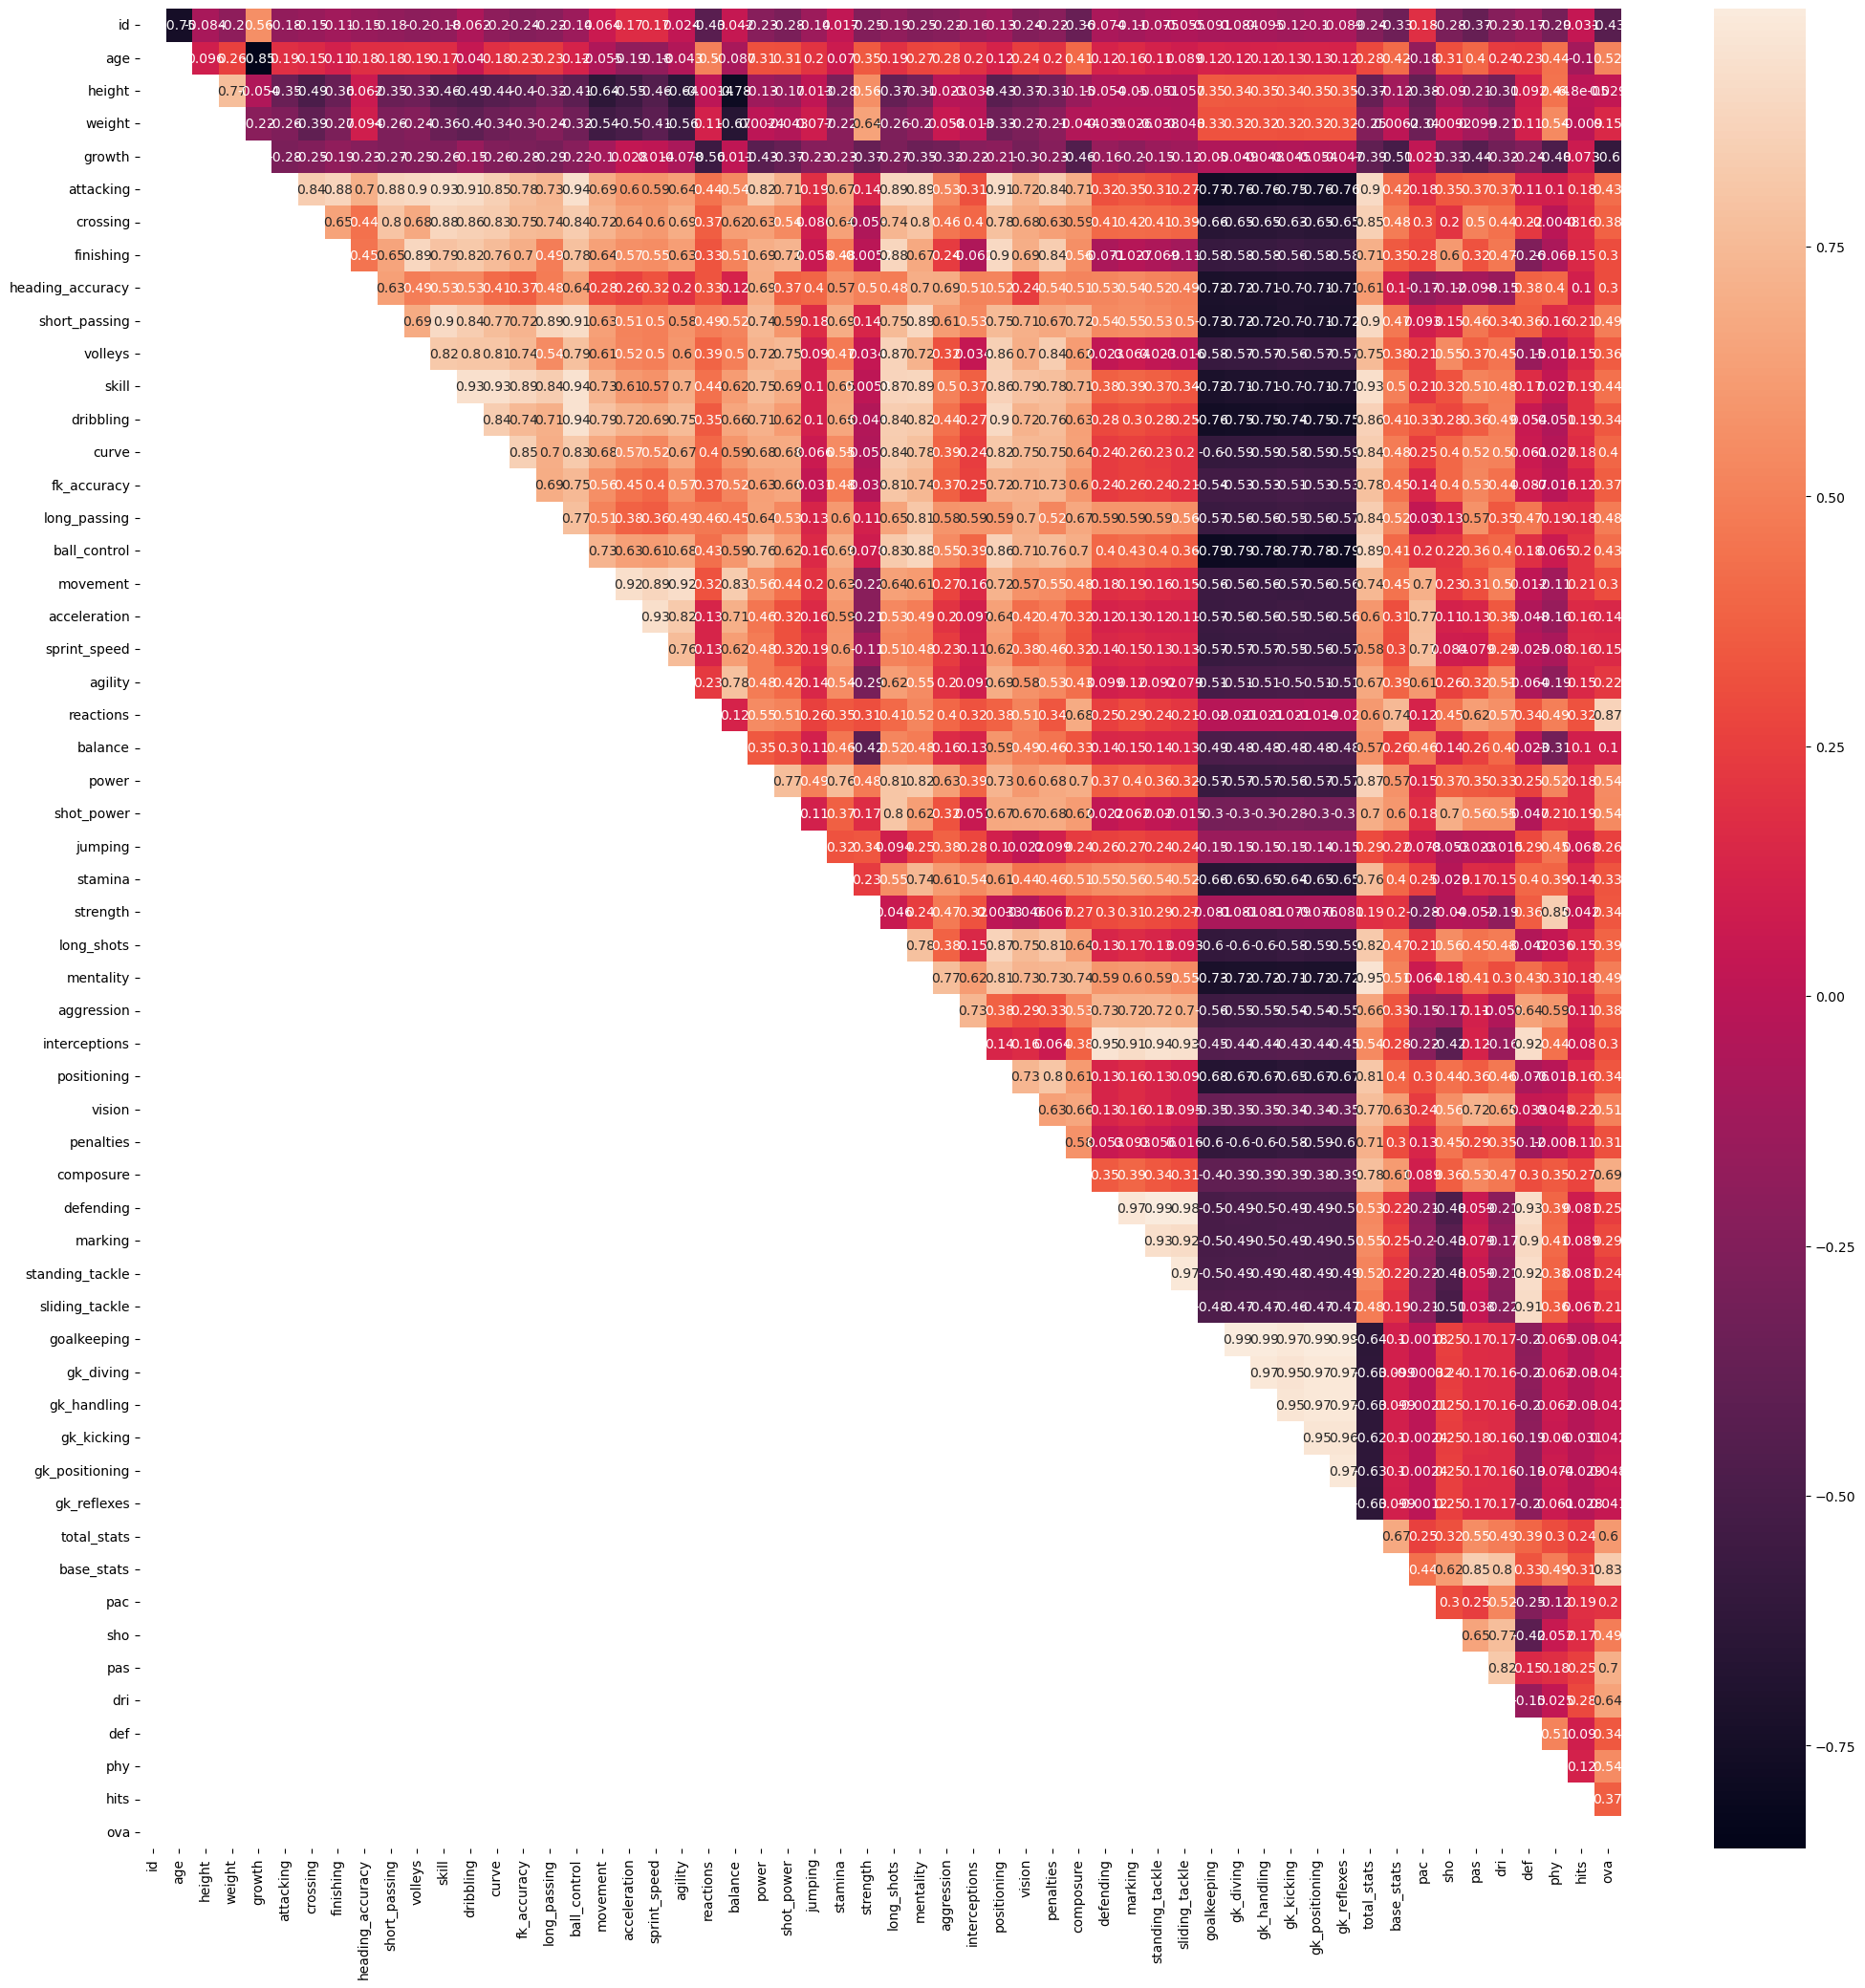

In [31]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix,annot=True)

In [32]:
stats.pearsonr(data_numerical['marking'],data_numerical['ova'])

PearsonRResult(statistic=0.2865535836400689, pvalue=3.3078564451166028e-257)

In [33]:
stats.pearsonr(data_numerical['standing_tackle'],data_numerical['ova'])

PearsonRResult(statistic=0.2365525720275069, pvalue=1.5046752980375905e-173)

In [34]:
stats.pearsonr(data_numerical['gk_handling'],data_numerical['ova'])

PearsonRResult(statistic=0.0415915298537793, pvalue=1.1169618708898859e-06)

In [35]:
stats.pearsonr(data_numerical['penalties'],data_numerical['ova'])

PearsonRResult(statistic=0.312604611384548, pvalue=2.921961983639389e-308)

In [36]:
stats.pearsonr(data_numerical['composure'],data_numerical['ova'])

PearsonRResult(statistic=0.692029323909838, pvalue=0.0)

In [37]:
stats.pearsonr(data_numerical['total_stats'],data_numerical['ova'])

PearsonRResult(statistic=0.6044321677601759, pvalue=0.0)

In [38]:
x_num=data_numerical[['marking','standing_tackle','gk_handling','reactions','base_stats']]
x_cat=data_cat

In [39]:
Y=data_numerical['ova']
y=pd.DataFrame(data_numerical['ova'])
y

,ova
0,64
1,77
2,80
3,59
4,65
...,...
13695,60
13696,59
13697,76
13698,63


In [40]:
transformer=StandardScaler().fit(x_num)
X_standardized=transformer.transform(x_num)

X_standardized_df=pd.DataFrame(X_standardized, columns=['marking','standing_tackle','gk_handling','reactions','base_stats'])
X_standardized_df

,marking,standing_tackle,gk_handling,reactions,base_stats
0,0.096941,0.368045,-0.219058,0.342515,-0.107236
1,-0.596473,-1.308024,-0.526567,1.340814,1.258988
2,-1.190828,-0.889006,-0.772573,1.673580,1.060264
3,0.394118,0.461160,-0.403563,-0.877629,-0.802768
4,0.542706,0.600833,-0.403563,-0.101174,-0.032715
...,...,...,...,...,...
13695,0.245529,0.414603,-0.034553,-1.432240,-1.150535
13696,-1.636594,-1.727041,2.425514,-0.433940,-1.076013
13697,-0.546944,-0.237202,-0.034553,1.118970,0.662817
13698,0.691295,0.647390,-0.526567,-0.212096,-0.380481


<AxesSubplot: ylabel='Density'>

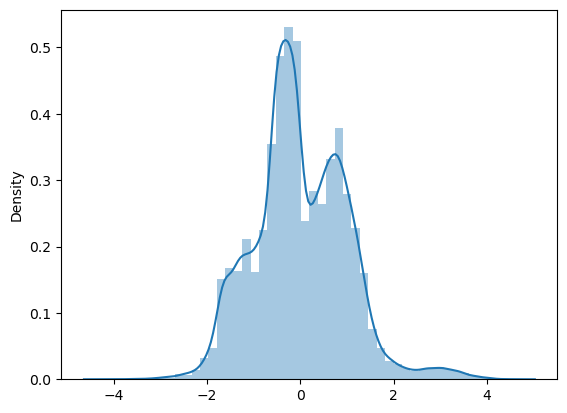

In [41]:
sns.distplot(X_standardized_df)

In [42]:
#transformer=Normalizer().fit(x_num)
#x_normalized=transformer.transform(x_num)
#x_normalized_df=pd.DataFrame(x_num)

#sns.distplot(x_normalized_df)

In [43]:
labels=preprocessing.OrdinalEncoder().fit(x_cat).transform(x_cat)
labels

array([[140., 314.,   4., ...,   1.,   0.,   2.],
       [ 28., 102.,  14., ...,   1.,   0.,   1.],
       [ 74.,  42.,   0., ...,   1.,   0.,   2.],
       ...,
       [137., 550.,  11., ...,   0.,   0.,   2.],
       [ 45., 515.,   2., ...,   1.,   2.,   2.],
       [ 55., 677.,   0., ...,   1.,   2.,   2.]])

In [44]:
X_JC=np.concatenate((X_standardized_df,labels),axis=1)
X_JC

array([[ 0.09694053,  0.3680453 , -0.21905821, ...,  1.        ,
         0.        ,  2.        ],
       [-0.59647314, -1.30802365, -0.52656661, ...,  1.        ,
         0.        ,  1.        ],
       [-1.19082772, -0.88900641, -0.77257333, ...,  1.        ,
         0.        ,  2.        ],
       ...,
       [-0.54694359, -0.23720182, -0.03455317, ...,  0.        ,
         0.        ,  2.        ],
       [ 0.69129511,  0.64739013, -0.52656661, ...,  1.        ,
         2.        ,  2.        ],
       [ 0.04741099,  0.41460278, -0.03455317, ...,  1.        ,
         2.        ,  2.        ]])

In [45]:
#plt.hist(labels)

In [46]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [47]:
#podemos tener un control de la selección aleatoria para que siempre sea la misma selección aleatoria
#no importa cuantas veces corramos esta celda con random state
X_train,X_test,y_train,y_test=train_test_split(X_JC,Y,test_size=0.2,random_state=5)

In [48]:
len(X_train)

10960

In [49]:
len(X_JC)

13700

In [50]:
len(X_test) 

2740

In [51]:
lm=linear_model.LinearRegression()
modelo_2=lm.fit(X_train, y_train)
modelo_2

LinearRegression()

In [52]:
modelo_2.coef_

array([ 4.89586594e-01, -3.40957666e-01,  1.99070685e-01,  3.80301434e+00,
        2.82003878e+00, -1.94118262e-03,  1.14462121e-05, -3.61226191e-02,
        6.09419566e-04, -6.91729414e-02, -3.77124520e-02, -2.08570187e-01])

In [53]:
modelo_2.intercept_

67.56987496571683

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
train_predictions=lm.predict(X_train)
r2_score(y_train,train_predictions)

0.8386351877747027

In [55]:
test_predictions=lm.predict(X_test)
r2_score(y_test,test_predictions)

0.8282658094638146

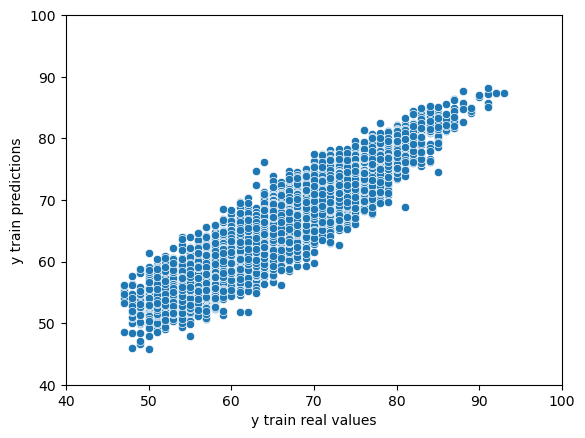

In [56]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=train_predictions)
ax.set_xlabel('y train real values')
ax.set_ylabel('y train predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

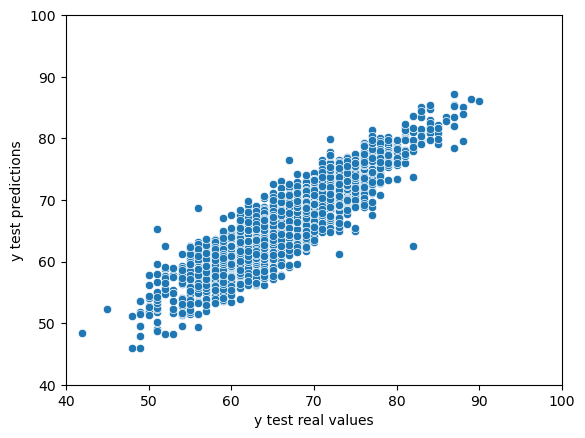

In [57]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=test_predictions)
ax.set_xlabel('y test real values')
ax.set_ylabel('y test predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

In [58]:
model_nc=sm.OLS(y_train,X_train).fit() #model with no constant/no intercept
model_nc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    ova   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          1.639e+04
Date:                Wed, 25 Jan 2023   Prob (F-statistic):                        0.00
Time:                        10:03:16   Log-Likelihood:                         -45565.
No. Observations:               10960   AIC:                                  9.115e+04
Df Residuals:                   10948   BIC:                                  9.124e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3762      0.406      5.851      0.000       1.580       3.172
x2             4.3120      0.409     10.554      0.000       3.511       5.113
x3             0.5863      0.207      2.836      0.005       0.181       0.992
x4             3.5968      0.227     15.842      0.000       3.152       4.042
x5             3.8867      0.239     16.251      0.000       3.418       4.355
x6             0.1107      0.003     37.719      0.000       0.105       0.116
x7             0.0228      0.001     42.566      0.000       0.022       0.024
x8             0.3494      0.049      7.186      0.000       0.254       0.445
x9             0.0372      0.001     26.169      0.000       0.034       0.040
x10           13.7216      0.322     42.679      0.000      13.091      14.352
x11            6.5352      0.165     39.669      0.000       6.212       6.858
x12            9.2470      0.178     51.840      0.000       8.897       9.597
==============================================================================
Omnibus:                       75.162   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.626
Skew:                           0.204   Prob(JB):                     2.30e-17
Kurtosis:                       2.970   Cond. No.                     2.15e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
y_train_pred_nc=model_nc.predict(X_train)

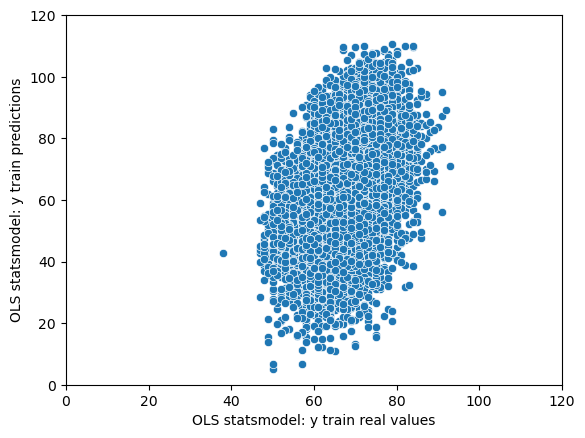

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=y_train_pred_nc)
ax.set_xlabel('OLS statsmodel: y train real values')
ax.set_ylabel('OLS statsmodel: y train predictions')
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
plt.show()

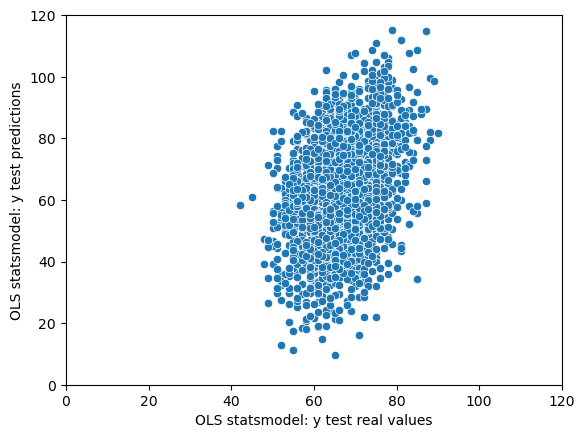

In [64]:
y_test_pred=model_nc.predict(X_test)
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=y_test_pred)
ax.set_xlabel('OLS statsmodel: y test real values')
ax.set_ylabel('OLS statsmodel: y test predictions')
ax.set_xlim(0, 120)
ax.set_ylim(0, 120)
plt.show()

In [61]:
X_train_const=sm.add_constant(X_train) #Statsmodel with intercept/with constant
model=sm.OLS(y_train,X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ova   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     4741.
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:03:17   Log-Likelihood:                -26668.
No. Observations:               10960   AIC:                         5.336e+04
Df Residuals:                   10947   BIC:                         5.346e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5699      0.117    577.317      0.000      67.340      67.799
x1             0.4896      0.072      6.753      0.000       0.347       0.632
x2            -0.3410      0.073     -4.651      0.000      -0.485      -0.197
x3             0.1991      0.037      5.398      0.000       0.127       0.271
x4             3.8030      0.040     93.924      0.000       3.724       3.882
x5             2.8200      0.043     66.055      0.000       2.736       2.904
x6            -0.0019      0.001     -3.475      0.001      -0.003      -0.001
x7          1.145e-05      0.000      0.111      0.912      -0.000       0.000
x8            -0.0361      0.009     -4.154      0.000      -0.053      -0.019
x9             0.0006      0.000      2.332      0.020    9.71e-05       0.001
x10           -0.0692      0.062     -1.114      0.265      -0.191       0.053
x11           -0.0377      0.032     -1.197      0.231      -0.099       0.024
x12           -0.2086      0.036     -5.829      0.000      -0.279      -0.138
==============================================================================
Omnibus:                       99.085   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.805
Skew:                           0.014   Prob(JB):                     7.32e-36
Kurtosis:                       3.595   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

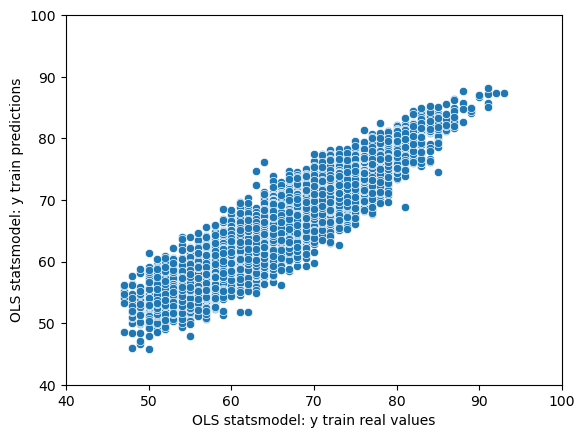

In [62]:
y_train_pred_const=model.predict(X_train_const)
fig, ax = plt.subplots()
sns.scatterplot(x=y_train, y=y_train_pred_const)
ax.set_xlabel('OLS statsmodel: y train real values')
ax.set_ylabel('OLS statsmodel: y train predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

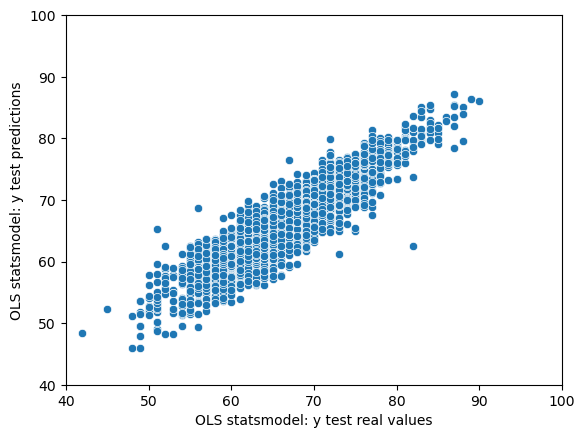

In [63]:
X_test_const=sm.add_constant(X_test)
y_test_pred=model.predict(X_test_const)
fig, ax = plt.subplots()
sns.scatterplot(x=y_test, y=y_test_pred)
ax.set_xlabel('OLS statsmodel: y test real values')
ax.set_ylabel('OLS statsmodel: y test predictions')
ax.set_xlim(40, 100)
ax.set_ylim(40, 100)
plt.show()

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
r2_new = r2_score(y_train_pred_nc, y_train) #OLS with No Constant
mse_new = mean_squared_error(y_train_pred_nc, y_train)
mae_new = mean_absolute_error(y_train_pred_nc, y_train)
rmse_new = sqrt(mse_new)

print('R2 Score:', r2_new)
print('Mean Squared Error:', mse_new)
print('Mean absolute Error:', mae_new)
print('Root Mean Squared Error:',rmse_new)

R2 Score: 0.06332284346973294
Mean Squared Error: 239.0862172969421
Mean absolute Error: 12.251316190420006
Root Mean Squared Error: 15.462413048969495


In [66]:
r2_new = r2_score(y_train_pred_const, y_train) #OLS with Constant
mse_new = mean_squared_error(y_train_pred_const, y_train)
mae_new = mean_absolute_error(y_train_pred_const, y_train)
rmse_new = sqrt(mse_new)

print('R2 Score:', r2_new)
print('Mean Squared Error:', mse_new)
print('Mean absolute Error:', mae_new)
print('Root Mean Squared Error:',rmse_new)

R2 Score: 0.8075864039839844
Mean Squared Error: 7.603026034672272
Mean absolute Error: 2.1532430232723305
Root Mean Squared Error: 2.7573585248698205
